In [501]:
!pip install catboost

In [502]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool

In [503]:
df = pd.read_csv("train.csv")

In [504]:
df2 = pd.read_csv("test.csv")

### **Train file**

In [505]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<ipython-input-506-96687b787b23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


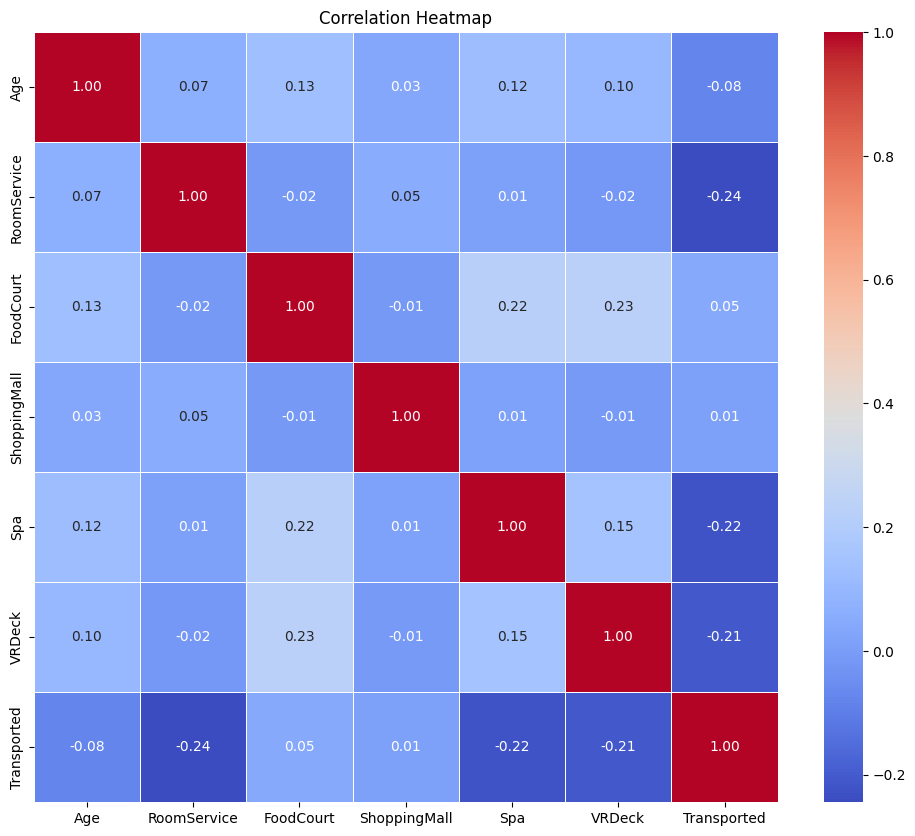

In [506]:
#Correlation Matrix
correlation_matrix = df.corr()

#Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [507]:
#dropping columns which don't have strong correlation with Transported
to_drop = ['Name']
df = df.drop(columns=to_drop)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [508]:
# interpolate rows with NaN values
df.interpolate(inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [509]:
df['VIP'].fillna(0, inplace=True)  # Replace NaN with 0 or another suitable value
df['CryoSleep'].fillna(0, inplace=True)
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False


In [510]:
distinct_values_dest = df['Destination'].unique()
distinct_values_dest

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [511]:
# Convert 'Destination' column to string type
df['Destination'] = df['Destination'].astype(str)

# Get the unique values from the 'Cabin' column and sort them
unique_valuesa= sorted(df['Destination'].unique())

# Create an ordinal mapping dictionary
ordinal_mappinga = {value: index for index, value in enumerate(unique_valuesa, start=1)}


# Apply the ordinal mapping to the 'Cabin' column
df['Destination'] = df['Destination'].map(ordinal_mappinga)


In [512]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,3,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,0,F/0/S,3,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,0,A/0/S,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,0,A/0/S,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,0,F/1/S,3,16.0,0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,1,G/1499/S,2,18.0,0,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,0,G/1500/S,3,26.0,0,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,0,E/608/S,1,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False


In [513]:
distinct_values_cabin = df['Cabin'].unique()
distinct_values_cabin

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [514]:
# Convert 'Cabin' column to string type
df['Cabin'] = df['Cabin'].astype(str)

# Get the unique values from the 'Cabin' column and sort them
unique_values = sorted(df['Cabin'].unique())

# Create an ordinal mapping dictionary
ordinal_mapping = {value: index for index, value in enumerate(unique_values, start=1)}

# Apply the ordinal mapping to the 'Cabin' column
df['Cabin'] = df['Cabin'].map(ordinal_mapping)


In [515]:
df['Cabin']

0        150
1       2185
2          2
3          2
4       2187
        ... 
8688     147
8689    5281
8690    5286
8691    2132
8692    2132
Name: Cabin, Length: 8693, dtype: int64

In [516]:
distinct_values_plan = df['HomePlanet'].unique()
distinct_values_plan

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [517]:
# Convert 'Home Planet' column to string type
df['HomePlanet'] = df['HomePlanet'].astype(str)

# Get the unique values from the 'Cabin' column and sort them
unique_valuesc= sorted(df['HomePlanet'].unique())

# Create an ordinal mapping dictionary
ordinal_mappingc = {value: index for index, value in enumerate(unique_valuesc, start=1)}


# Apply the ordinal mapping to the 'Cabin' column
df['HomePlanet'] = df['HomePlanet'].map(ordinal_mappingc)


In [518]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,2,0,150,3,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,1,0,2185,3,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,2,0,2,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,2,0,2,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,1,0,2187,3,16.0,0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,2,0,147,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,1,1,5281,2,18.0,0,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,1,0,5286,3,26.0,0,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,2,0,2132,1,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False


<ipython-input-519-96687b787b23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


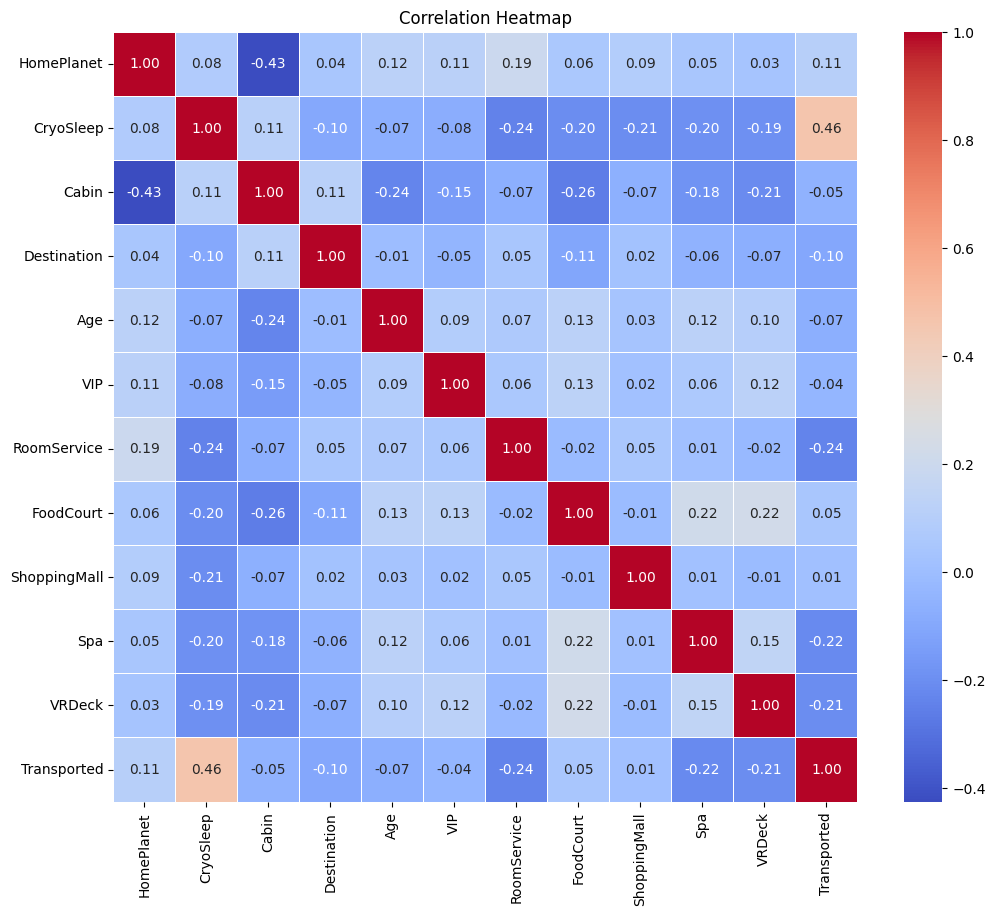

In [519]:
#Correlation Matrix
correlation_matrix = df.corr()

#Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## **Test file**

In [520]:
#dropping columns which don't have strong correlation with Transported
to_drop = ['Name']
df2 = df2.drop(columns=to_drop)
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [521]:
# interpolate rows with NaN values
df2.interpolate(inplace=True)

In [522]:
df2['VIP'].fillna(0, inplace=True)  # Replace NaN with 0 or another suitable value
df2['CryoSleep'].fillna(0, inplace=True)
df2['VIP'] = df2['VIP'].astype(int)
df2['CryoSleep'] = df2['CryoSleep'].astype(int)

df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,1,D/296/P,55 Cancri e,42.333333,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,0,D/297/P,NaN,42.666667,0,0.0,2680.0,0.0,0.0,523.0


In [523]:
# Convert 'Destination' column to string type
df2['Destination'] = df2['Destination'].astype(str)

# Get the unique values from the 'Cabin' column and sort them
unique_valuesd= sorted(df2['Destination'].unique())

# Create an ordinal mapping dictionary
ordinal_mappingd = {value: index for index, value in enumerate(unique_valuesd, start=1)}


# Apply the ordinal mapping to the 'Cabin' column
df2['Destination'] = df2['Destination'].map(ordinal_mappingd)
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,G/3/S,3,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,F/4/S,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,C/0/S,1,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,C/1/S,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,F/5/S,3,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,3,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,0,NaN,3,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,1,D/296/P,1,42.333333,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,0,D/297/P,4,42.666667,0,0.0,2680.0,0.0,0.0,523.0


In [524]:
distinct_values_cabin = df2['Cabin'].unique()
distinct_values_cabin

array(['G/3/S', 'F/4/S', 'C/0/S', ..., 'D/296/P', 'D/297/P', 'G/1498/S'],
      dtype=object)

In [525]:
# Convert 'Cabin' column to string type
df2['Cabin'] = df2['Cabin'].astype(str)

# Get the unique values from the 'Cabin' column and sort them
unique_values2 = sorted(df2['Cabin'].unique())

# Create an ordinal mapping dictionary
ordinal_mapping2 = {value: index for index, value in enumerate(unique_values2, start=1)}


# Apply the ordinal mapping to the 'Cabin' column
df2['Cabin'] = df2['Cabin'].map(ordinal_mapping2)
df2


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,1,2785,3,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,0,1868,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,1,258,1,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,0,260,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,0,1941,3,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,2680,3,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,Earth,0,3266,3,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,Mars,1,603,1,42.333333,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,Europa,0,604,4,42.666667,0,0.0,2680.0,0.0,0.0,523.0


In [526]:
# Convert 'Home Planet' column to string type
df2['HomePlanet'] = df2['HomePlanet'].astype(str)

# Get the unique values from the 'Cabin' column and sort them
unique_valuesb= sorted(df2['HomePlanet'].unique())

# Create an ordinal mapping dictionary
ordinal_mappingb = {value: index for index, value in enumerate(unique_valuesb, start=1)}


# Apply the ordinal mapping to the 'Cabin' column
df2['HomePlanet'] = df2['HomePlanet'].map(ordinal_mappingb)
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,1,2785,3,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,1868,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,2,1,258,1,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,2,0,260,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,1941,3,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,2680,3,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,3266,3,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,3,1,603,1,42.333333,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,2,0,604,4,42.666667,0,0.0,2680.0,0.0,0.0,523.0


In [527]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,2,0,150,3,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,1,0,2185,3,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,2,0,2,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,2,0,2,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,1,0,2187,3,16.0,0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,2,0,147,1,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,1,1,5281,2,18.0,0,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,1,0,5286,3,26.0,0,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,2,0,2132,1,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False


In [528]:
df2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,1,1,2785,3,27.000000,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,1,0,1868,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,2,1,258,1,31.000000,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,2,0,260,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,1,0,1941,3,20.000000,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,1,2680,3,34.000000,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,1,0,3266,3,42.000000,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,3,1,603,1,42.333333,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,2,0,604,4,42.666667,0,0.0,2680.0,0.0,0.0,523.0


In [590]:
# Assuming df is your DataFrame with 'feature1', 'feature2', and 'target'
X = df[['RoomService','Spa','VRDeck','Cabin','HomePlanet','Age','Destination']]
y = df['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)



In [569]:
# Assuming X_train, y_train, X_test, y_test are your training and testing data
train_data = Pool(data=X_train, label=y_train)
test_data = Pool(data=X_test, label=y_test)

In [607]:
# Initialize CatBoostClassifier with specified hyperparameters
model = CatBoostClassifier(iterations=150, depth=9, learning_rate=0.2, loss_function='Logloss', eval_metric='Accuracy')

# Train the model
model.fit(train_data, eval_set=test_data, verbose=True)


0:	learn: 0.7750224	test: 0.7873563	best: 0.7873563 (0)	total: 27.6ms	remaining: 4.11s
1:	learn: 0.7768120	test: 0.7977011	best: 0.7977011 (1)	total: 46.8ms	remaining: 3.46s
2:	learn: 0.7807746	test: 0.8011494	best: 0.8011494 (2)	total: 69.3ms	remaining: 3.4s
3:	learn: 0.7834590	test: 0.7965517	best: 0.8011494 (2)	total: 91.1ms	remaining: 3.32s
4:	learn: 0.7847373	test: 0.7977011	best: 0.8011494 (2)	total: 134ms	remaining: 3.9s
5:	learn: 0.7862713	test: 0.8022989	best: 0.8022989 (5)	total: 171ms	remaining: 4.11s
6:	learn: 0.7874217	test: 0.8034483	best: 0.8034483 (6)	total: 202ms	remaining: 4.13s
7:	learn: 0.7869104	test: 0.8011494	best: 0.8034483 (6)	total: 227ms	remaining: 4.03s
8:	learn: 0.7878052	test: 0.8011494	best: 0.8034483 (6)	total: 250ms	remaining: 3.92s
9:	learn: 0.7878052	test: 0.8034483	best: 0.8034483 (6)	total: 274ms	remaining: 3.84s
10:	learn: 0.7885722	test: 0.8057471	best: 0.8057471 (10)	total: 299ms	remaining: 3.77s
11:	learn: 0.7895948	test: 0.8080460	best: 0.80804

In [608]:
predictions = model.predict(test_data)


In [609]:
from sklearn.metrics import accuracy_score, classification_report

# Ensure consistent encoding in y_pred
y_test = y_test.astype(str)


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.76      0.79       403
        True       0.80      0.85      0.83       467

    accuracy                           0.81       870
   macro avg       0.81      0.81      0.81       870
weighted avg       0.81      0.81      0.81       870



In [592]:
# Assuming model is a trained CatBoostClassifier
importance = model.get_feature_importance()

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'feature': model.feature_names_, 'importance': importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)


       feature  importance
3        Cabin   22.081545
1          Spa   19.135074
4   HomePlanet   15.740746
2       VRDeck   15.522421
0  RoomService   14.261407
5          Age    6.762649
6  Destination    6.496157


In [593]:
df2.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [594]:
print(test_data.shape)
print(df2.shape)


(870, 7)
(4277, 13)


In [595]:
features = df2[['RoomService','Spa','VRDeck','Cabin','HomePlanet','Age','Destination']]

In [596]:
# Create a Pool for the test data without specifying categorical features
test_pool = Pool(features)

# Extract the probability of the positive class (class 1)
predictions_proba = model.predict_proba(test_pool)[:, 1]

# Rest of the code remains the same
predictions = (predictions_proba > 0.5).astype(int)
print(predictions.shape)

# Add the predictions to the test dataframe
df2['Transported'] = predictions


(4277,)


In [597]:
df2['Transported'] = df2['Transported'].astype(bool)
# Display or save the results
print(df2[['PassengerId','Transported']])
final_df = df2[['PassengerId','Transported']]

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [598]:
final_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [600]:
# Save the DataFrame to a CSV file
output_filename = 'submissions2new.csv'
final_df.to_csv(output_filename, index=False)